<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/assessment_rrr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

import sklearn
sklearn.set_config(transform_output="pandas")


!pip install category_encoders -q


%matplotlib inline

from sklearn.pipeline import Pipeline, make_pipeline



from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler


from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz


from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')


from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

from sklearn.preprocessing import MinMaxScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.4 MB/s eta 0:00:00


In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##DATA/DOMAIN UNDERSTANDING AND EXPLORATION

In [47]:
#  load and view the first 5 rows
df_main = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')


In [48]:
# Sample observation and check correct parsing of data
df_main.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [49]:
# Identify qualitative and quantitative features
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [50]:
# Analyse data distribution
df_main.describe()


,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [73]:
# reload data frame
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')
# create lists for for visualisation
num = ['mileage', 'year_of_registration']
cat = ['reg_code', 'standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type', 'crossover_car_and_van','fuel_type']



In [74]:
df1.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid


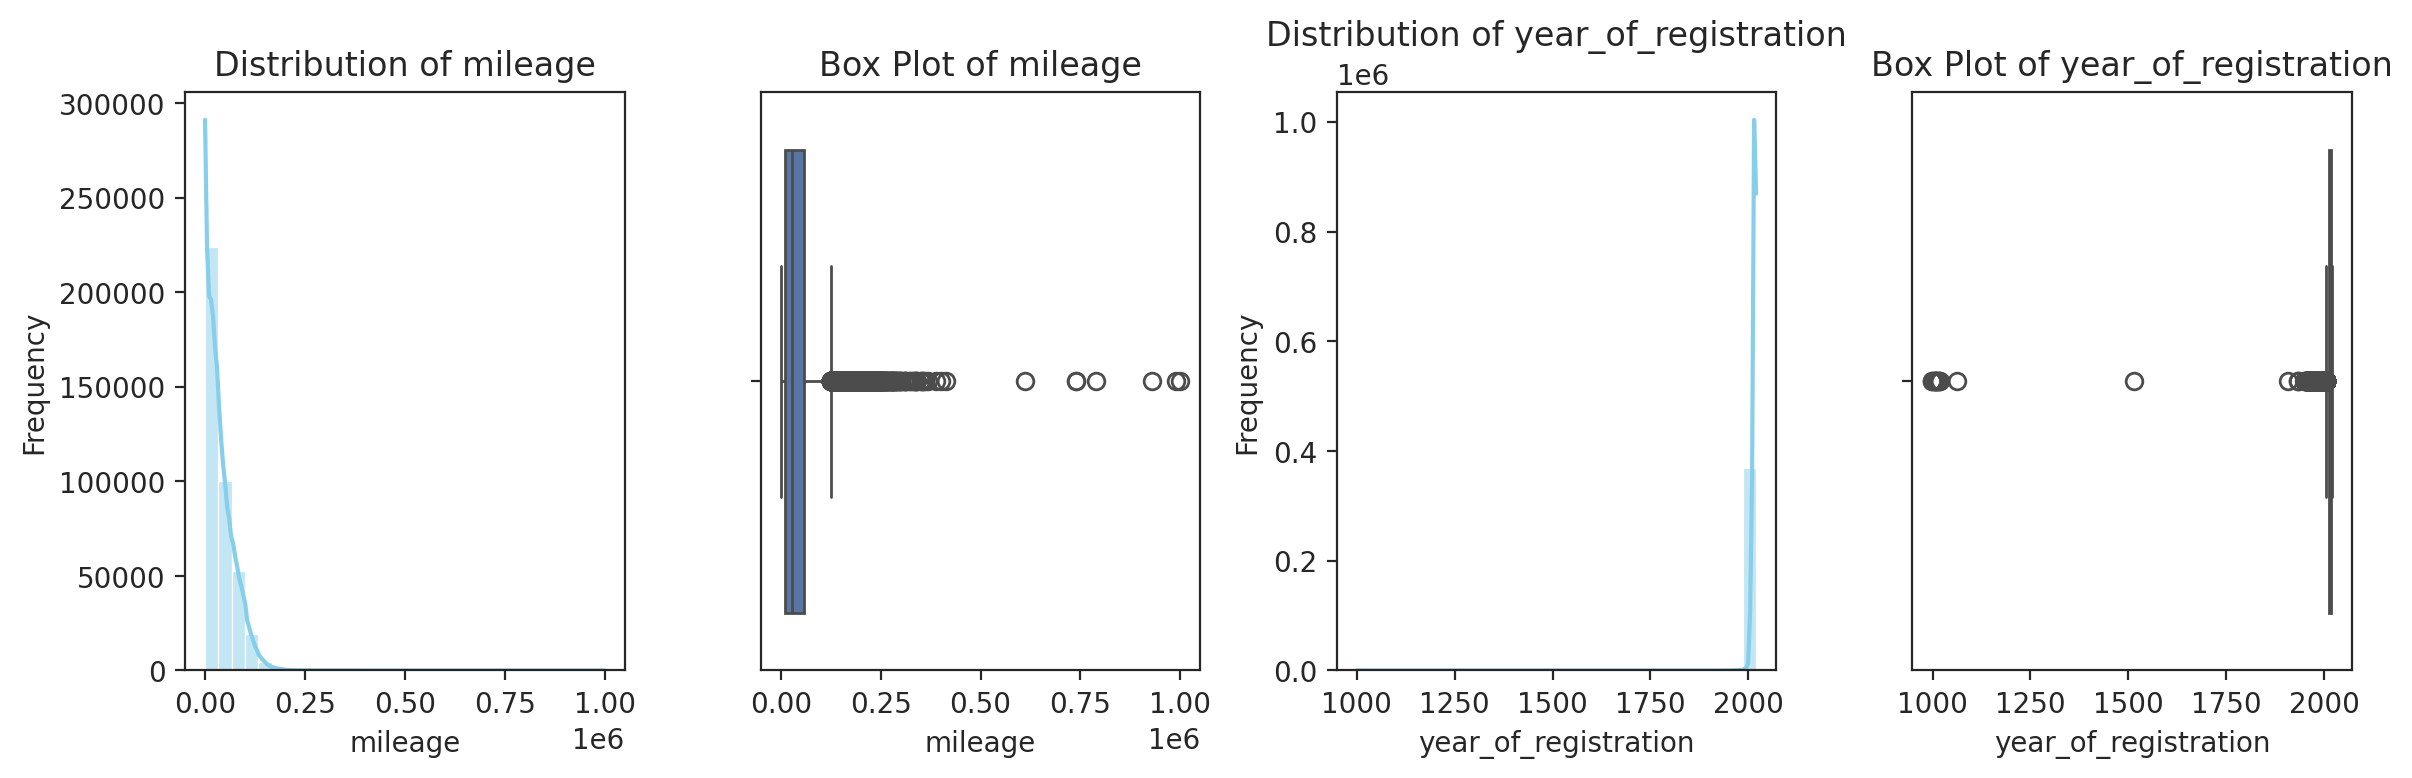

In [75]:
# Visualize the Distribution of of first list using boxplots and histplot

# Set up a 1x4 subplot layout (1 rows, 4 columns)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Loop through numerical features and analyze its distribution
for i, column in enumerate(df1[num].columns):
    # Visualize the distribution using a histogram in the first row
    sns.histplot(df1[num][column], bins=30, kde=True, color='skyblue', ax=axes[i*2])
    axes[i*2].set_title(f'Distribution of {column}')
    axes[i*2].set_xlabel(column)
    axes[i*2].set_ylabel('Frequency')

    # Add a box plot to the second row
    sns.boxplot(x=df1[num][column], ax=axes[i*2+1], showfliers=True)
    axes[i*2+1].set_title(f'Box Plot of {column}')
    axes[i*2+1].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

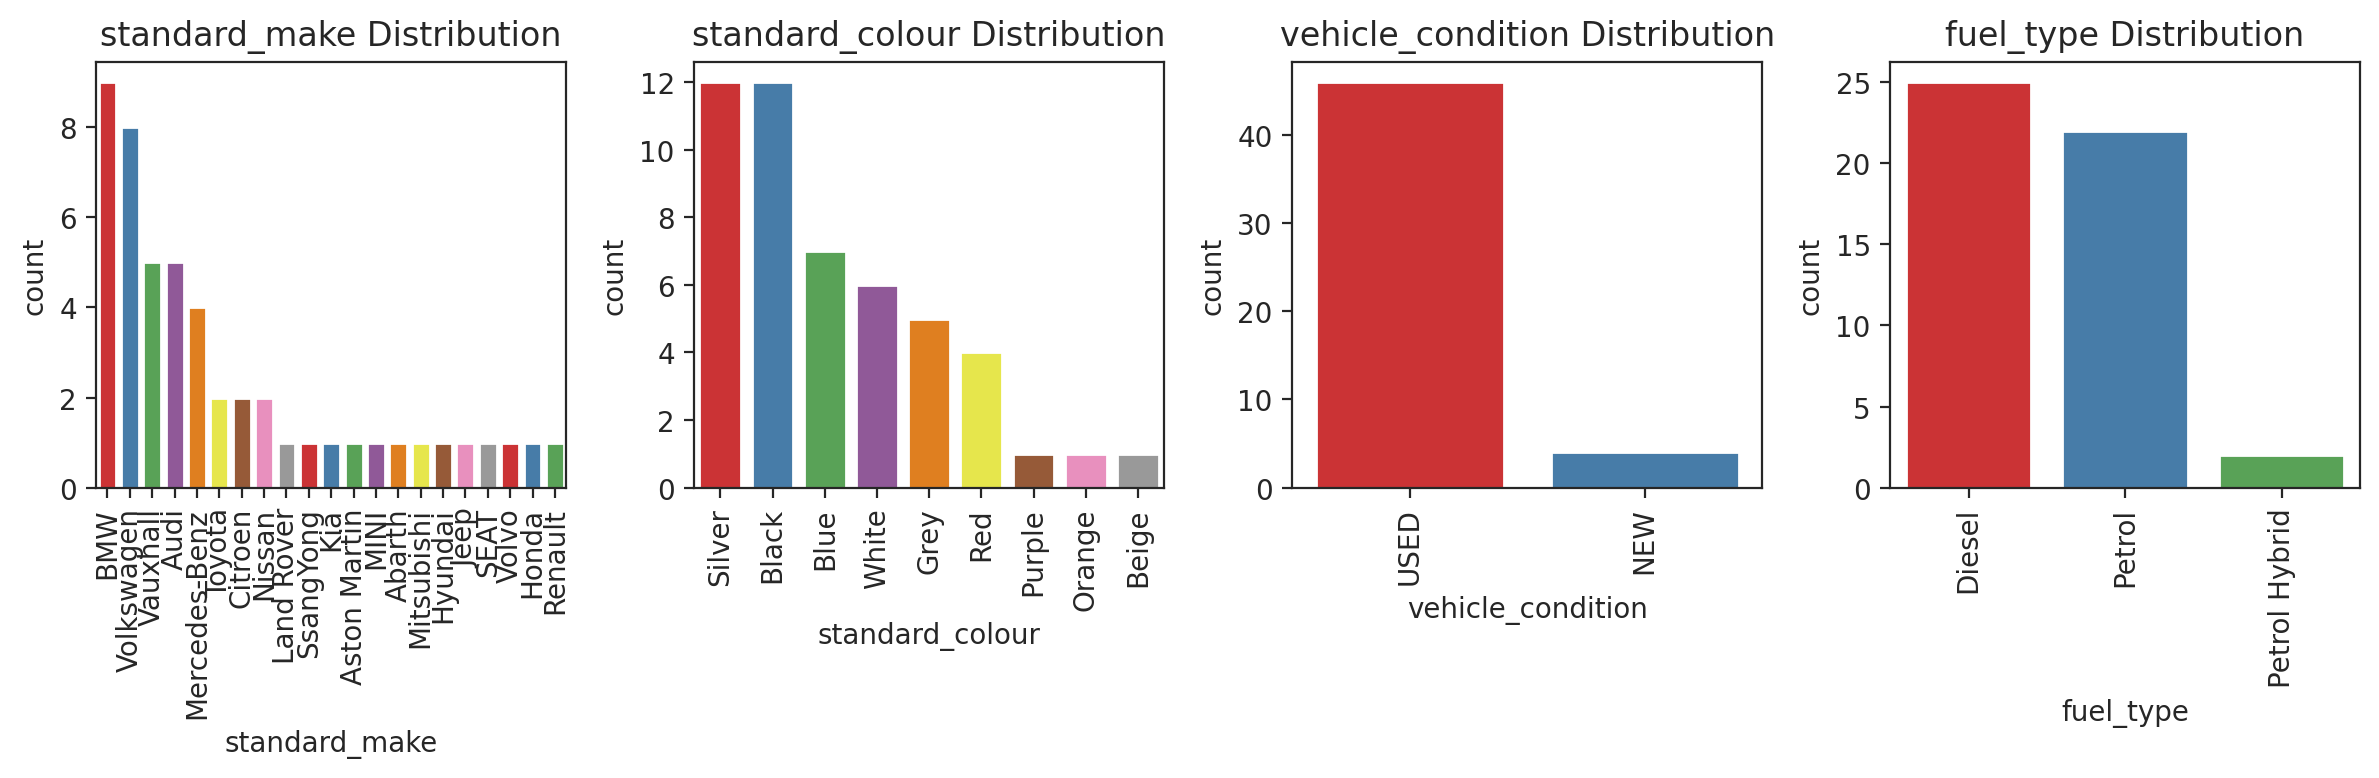

In [76]:
# Visualize Categorical features using countplot (bar plots)

categorical_features = ['standard_make', 'standard_colour', 'vehicle_condition', 'fuel_type']

# Randomly sample a subset of your data (adjust the sample size as needed)
sample_size = 50


# Calculate the number of rows and columns for the subplots grid
num_rows = 1
num_cols = 4

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Flatten the axes array to simplify indexing in the loop
# axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Sample the data for the current feature
    sampled_data = df1[feature].sample(n=sample_size, random_state=42)

    # Create a count plot for the current feature on the corresponding subplot
    sns.countplot(x=sampled_data, order=sampled_data.value_counts().index, palette="Set1", ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

    # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

In [77]:
df1.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid


**Analysis of Predictive Power of Features**

In [78]:
# Calculate correlation matrix
corr_matrix = df1.corr()
target_corr = corr_matrix['price'].abs().sort_values(ascending=False)
target_corr


price                    1.000000
mileage                  0.160204
year_of_registration     0.102341
public_reference         0.052344
crossover_car_and_van    0.010402
Name: price, dtype: float64

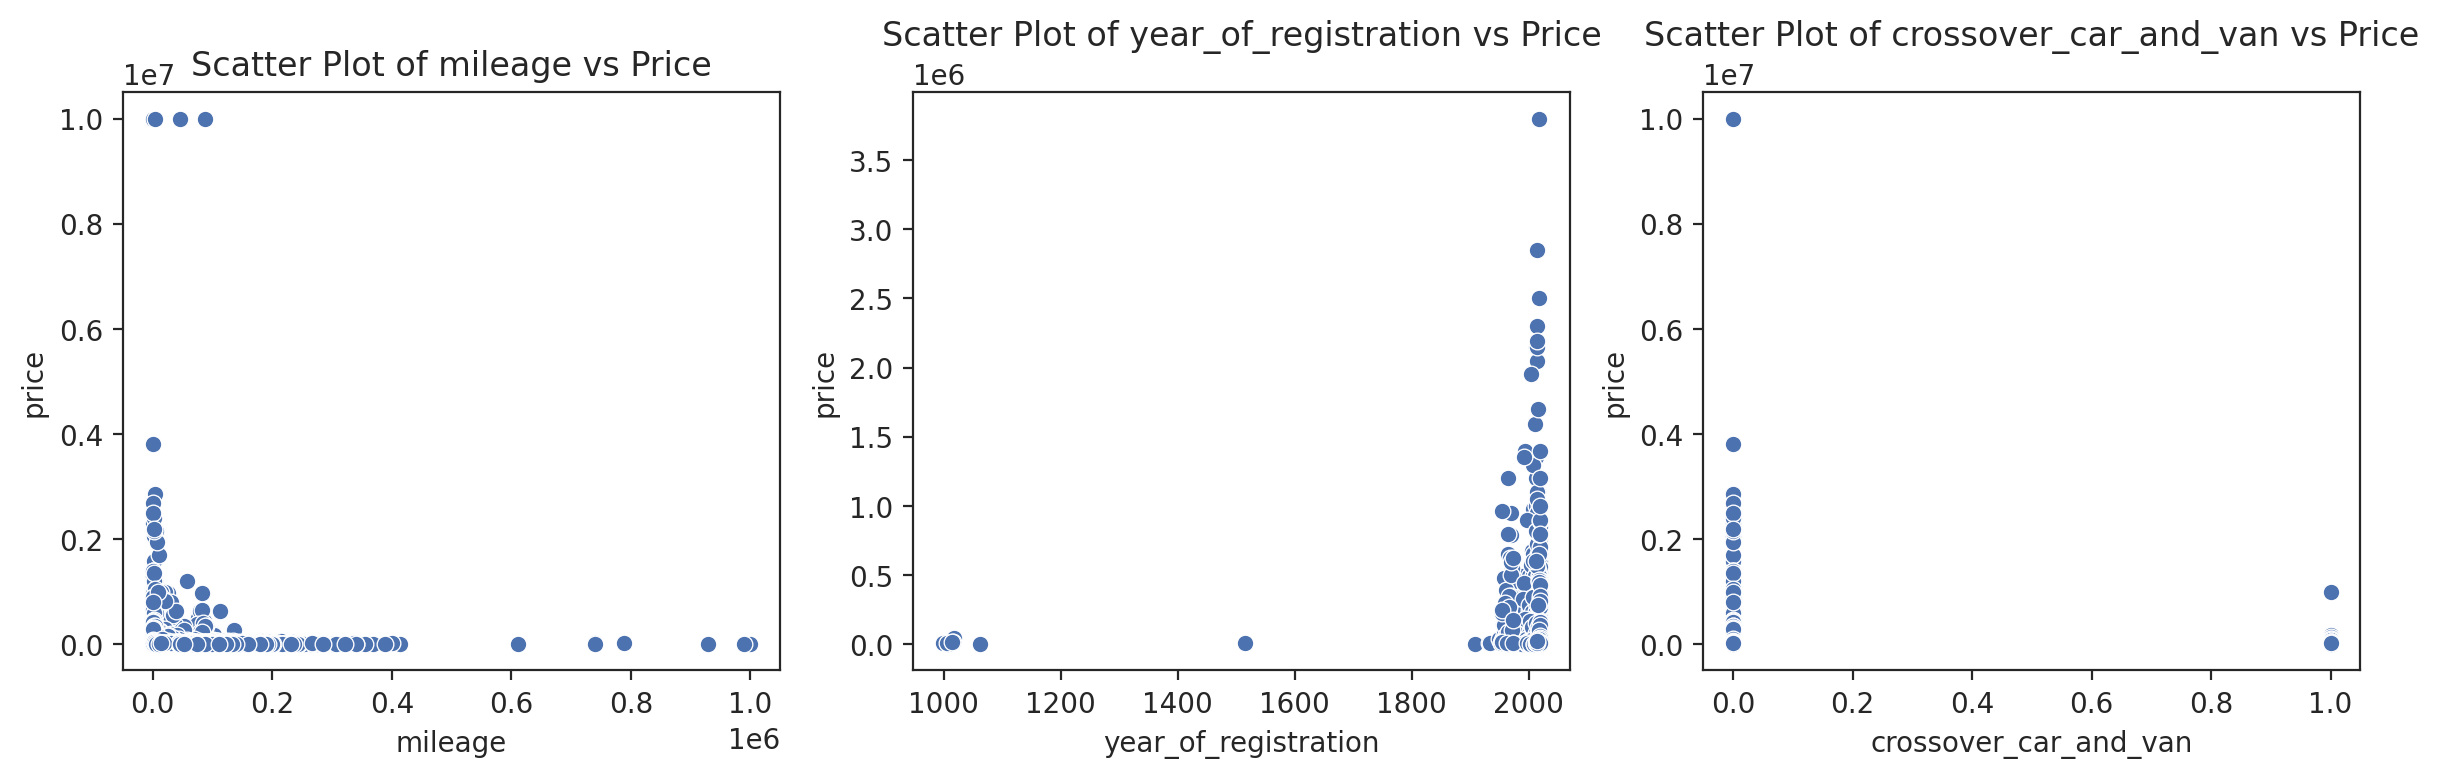

In [79]:
# Plot scatter plot

num = ['mileage', 'year_of_registration','crossover_car_and_van']

# Create a 1x4 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot scatter plots for each pair of numerical variables
for i, var in enumerate(num):
    sns.scatterplot(x=var, y='price', data=df1, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {var} vs Price')

# Adjust layout
plt.tight_layout()
plt.show()



**Analysis of Predictive Power of Categorical Features**

In [80]:
# reload data
dfe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')


In [81]:
dfe.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid


In [82]:
# Fill missing values

mean = dfe["mileage"].mean().round(1)
dfe['mileage'] = dfe["mileage"].replace(0.0, mean )
dfe['mileage'] = dfe["mileage"].replace(np.nan, mean )

other_feat = ['reg_code', 'standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type','fuel_type', 'year_of_registration']

mode = dfe [other_feat].mode().iloc[0]
dfe[other_feat] = dfe[other_feat].replace(np.nan, mode )

# view data frame
dfe.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,37743.6,17,Grey,Volvo,XC90,NEW,2017.0,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [83]:
# correlation analysis for categorical features

encoder = TargetEncoder()
encoded_features = encoder.fit_transform(dfe[['standard_colour', 'standard_make' , 'standard_model','vehicle_condition', 'body_type', 'fuel_type']], dfe['price'])

# Create a DataFrame with encoded features and the target variable
df_encoded = pd.concat([
                        pd.DataFrame(encoded_features,
                                     columns=encoder.get_feature_names_out([
                                                                            'standard_colour', 'standard_make', 'standard_model',
                                                                            'vehicle_condition','body_type','fuel_type'])),
                                                                             dfe['price']],
                                                                             axis=1)

correlation_matrix = df_encoded.corr()
target_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)
target_correlation


price                1.000000
standard_model       0.617101
standard_make        0.349930
body_type            0.156080
vehicle_condition    0.096930
fuel_type            0.071240
standard_colour      0.049469
Name: price, dtype: float64

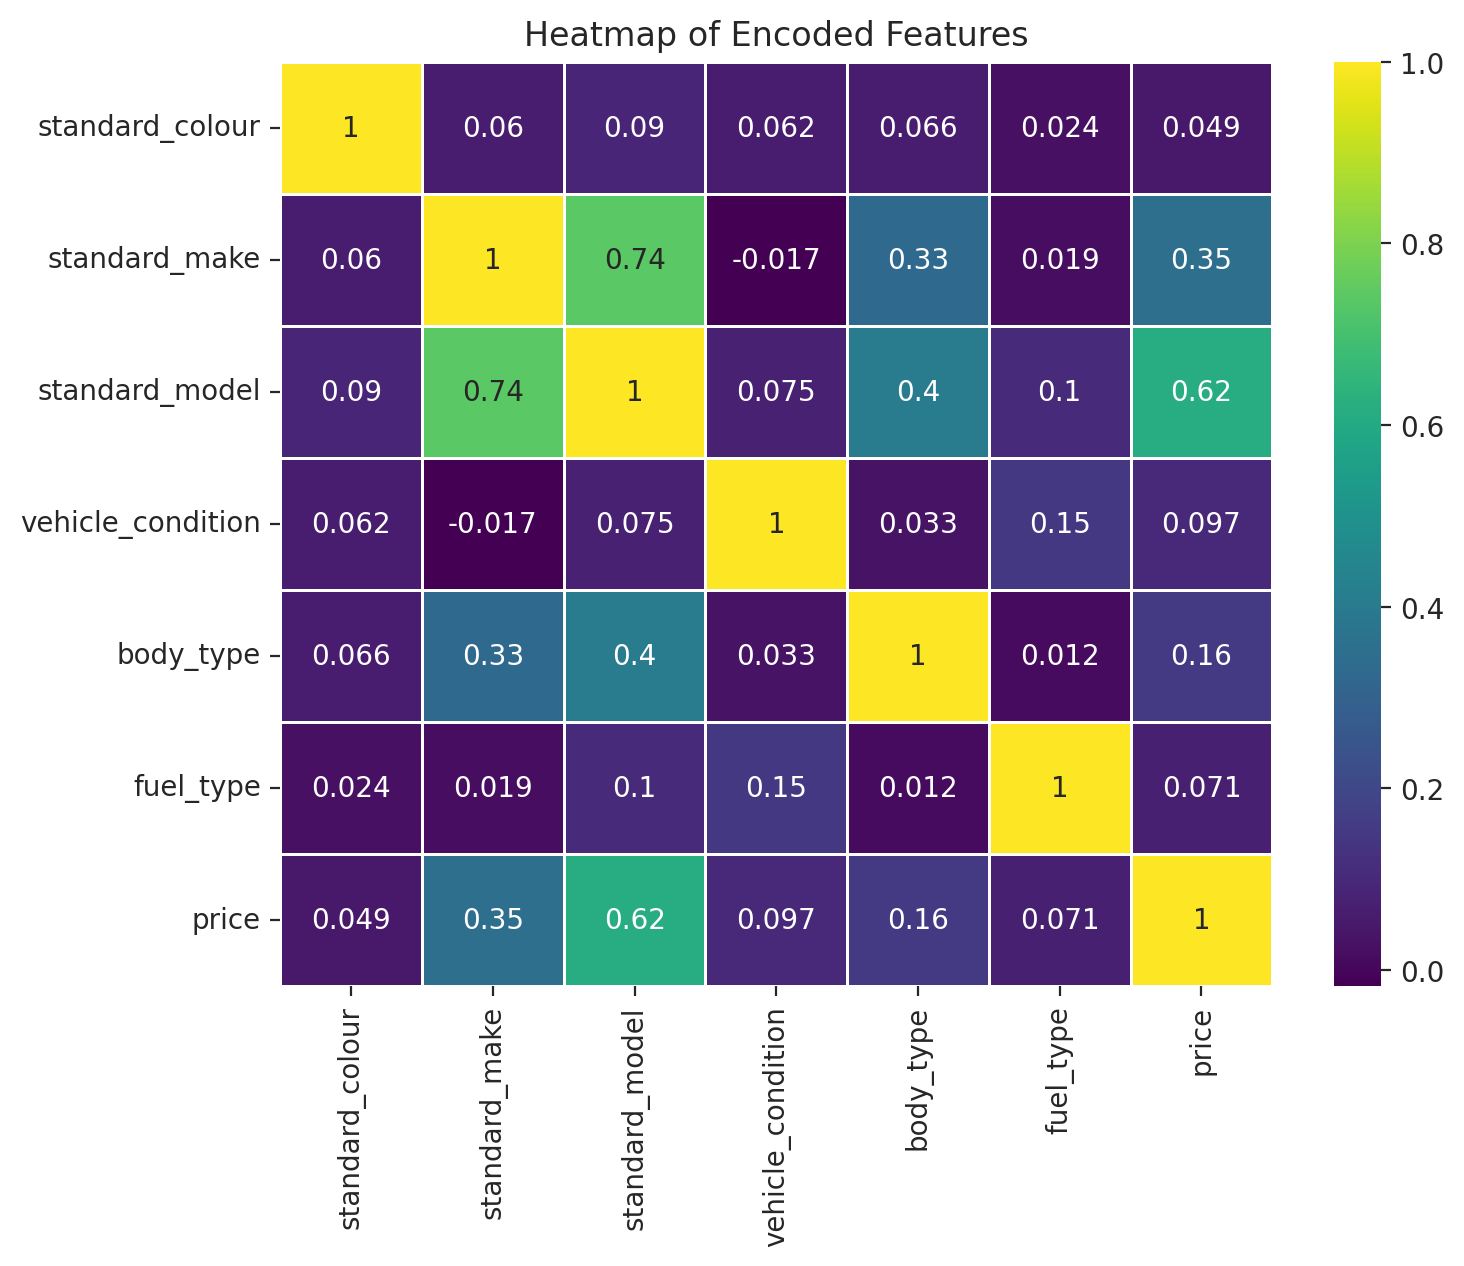

In [84]:
#Create a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap of Encoded Features')
plt.show()

**# Get more information about the data**

In [85]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')

In [86]:
# Get more information about the data

# Check for missing values and convert to data frame
missing_value_counts_df = pd.DataFrame(df1.isnull().sum(), columns=['Missing Value Count'])
missing_value_counts_df

,Missing Value Count
public_reference,0
mileage,127
reg_code,31857
standard_colour,5378
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,33311
price,0
body_type,837


In [87]:
# get unique values and display in data frame
unique_counts_df = pd.DataFrame(df1.nunique(), columns=['Unique'])
unique_counts_df

,Unique
public_reference,402005
mileage,80634
reg_code,72
standard_colour,22
standard_make,110
standard_model,1168
vehicle_condition,2
year_of_registration,84
price,30578
body_type,16


In [88]:
# get data frame info, convert to data frame and concatenate all in a data frame

import io
buf = io.StringIO()
df1.info(buf=buf)
a = buf.getvalue()
lines = [line.split() for line in a.splitlines()[3:-2]]
df_inf = pd.DataFrame(lines).drop(columns = 0)
df_inf = df_inf.drop(1)


# Set the first row as the header
df_inf.columns = df_inf.iloc[0]

# Drop row 0
df_inf = df_inf.drop(0)

# set column features as index
df_inf = df_inf.set_index('Column')

# Concatenate along the rows (axis=0)
result = pd.concat([df_inf, unique_counts_df, missing_value_counts_df], axis =1, ignore_index=False)

result

,Non-Null,Count,Dtype,Unique,Missing Value Count
public_reference,402005,non-null,int64,402005,0
mileage,401878,non-null,float64,80634,127
reg_code,370148,non-null,object,72,31857
standard_colour,396627,non-null,object,22,5378
standard_make,402005,non-null,object,110,0
standard_model,402005,non-null,object,1168,0
vehicle_condition,402005,non-null,object,2,0
year_of_registration,368694,non-null,float64,84,33311
price,402005,non-null,int64,30578,0
body_type,401168,non-null,object,16,837


In [89]:
# Calculate Descriptive Statistics
df1.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


##Data Processing for Machine Learning

In [5]:
# load data
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')
df2.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


**Detect and deal with errorneous value, missing values and outliers**

In [6]:
# check data information
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [7]:
# Fill missing values

mean = df2["mileage"].mean().round(1)
df2['mileage'] = df2["mileage"].replace(0.0, mean )
df2['mileage'] = df2["mileage"].replace(np.nan, mean )

other_feat = ['reg_code', 'standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type','fuel_type', 'year_of_registration']

mode = df2 [other_feat].mode().iloc[0]
df2[other_feat] = df2[other_feat].replace(np.nan, mode )


In [8]:
# check my missing values
print(df2.isnull().sum())


public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64


In [11]:
# Remove outliers for "mileage"
lo, hi = df2["mileage"].quantile([0.1, 0.9])
mask_mileage = df2["mileage"].between(lo, hi)

df = df2[mask_mileage]

In [13]:
# subset price t0 <= 20000
mask_price = df["price"] <= 20_000
df = df[ mask_price]

<Axes: xlabel='mileage'>

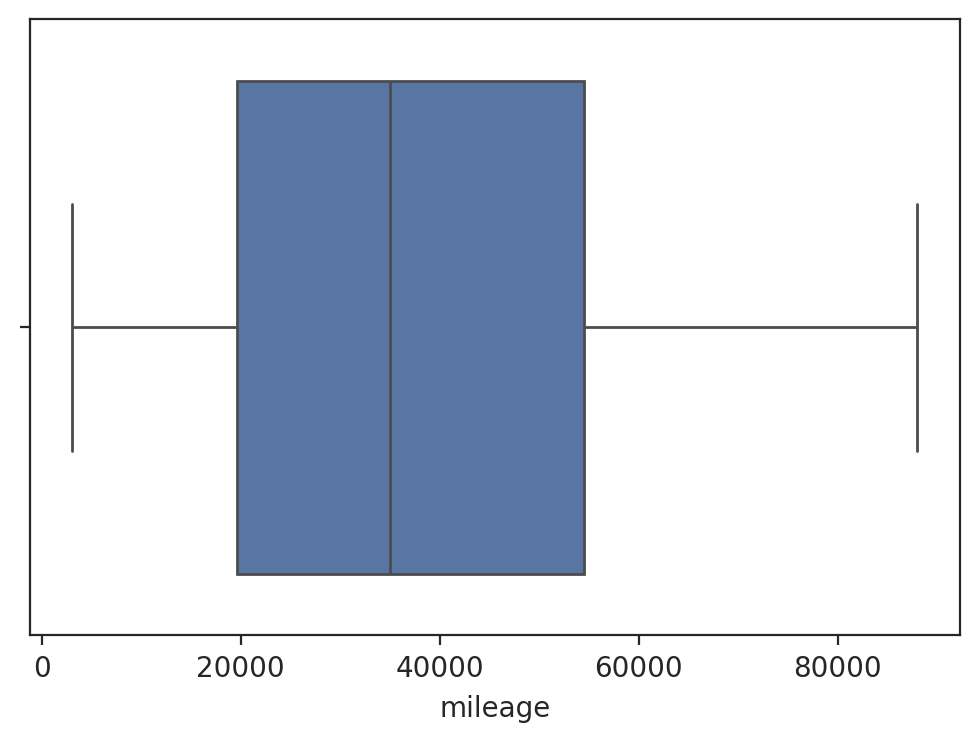

In [14]:
sns.boxplot(x=df['mileage'])

In [15]:
# Check for high cardinality
df.nunique()

public_reference         250010
mileage                   64147
reg_code                     67
standard_colour              21
standard_make                78
standard_model              840
vehicle_condition             2
year_of_registration         75
price                     12675
body_type                    15
crossover_car_and_van         2
fuel_type                     8
dtype: int64

In [16]:
# Drop columns coloums with high cardinality
df = df.drop(columns = ['public_reference','reg_code'])
df.head()


,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
6,24075.0,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol
10,77000.0,Grey,Volkswagen,Passat,USED,2010.0,4499,Saloon,False,Diesel
11,24487.0,Black,Peugeot,208,USED,2017.0,8795,Hatchback,False,Petrol


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250010 entries, 2 to 402003
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                250010 non-null  float64
 1   standard_colour        250010 non-null  object 
 2   standard_make          250010 non-null  object 
 3   standard_model         250010 non-null  object 
 4   vehicle_condition      250010 non-null  object 
 5   year_of_registration   250010 non-null  float64
 6   price                  250010 non-null  int64  
 7   body_type              250010 non-null  object 
 8   crossover_car_and_van  250010 non-null  bool   
 9   fuel_type              250010 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 19.3+ MB


In [18]:
# Apply the mask to filter to set the minimum count threshold
filt_df = df[df['standard_make'].map(df['standard_make'].value_counts()) > 20]

filt_df = df[df['standard_model'].map(df['standard_model'].value_counts()) > 20]

filt_df = df[df['body_type'].map(df['body_type'].value_counts()) > 20]
df_m = filt_df

In [19]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249970 entries, 2 to 402003
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mileage                249970 non-null  float64
 1   standard_colour        249970 non-null  object 
 2   standard_make          249970 non-null  object 
 3   standard_model         249970 non-null  object 
 4   vehicle_condition      249970 non-null  object 
 5   year_of_registration   249970 non-null  float64
 6   price                  249970 non-null  int64  
 7   body_type              249970 non-null  object 
 8   crossover_car_and_van  249970 non-null  bool   
 9   fuel_type              249970 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 19.3+ MB


In [22]:
# create lists for numerical and categorical features

target = 'price'
cat_feat = ["standard_model",'standard_make','body_type']
nume_feat = ['mileage', "year_of_registration"]




In [23]:
# Select feature matrix and target vector
X = df_m[cat_feat + nume_feat]
y = df_m[target]

In [24]:
# Split data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

##Model Building

**PIPE LINE**

In [25]:
# Create pipeline for numerical features
num_xformer = Pipeline(
                    steps=[
                             ("imputer", SimpleImputer(strategy="most_frequent")),
                             ('scaler', MinMaxScaler())
                          ]
                )
num_xformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('scaler', MinMaxScaler())])

In [26]:
# Create pipeline for categorical features
cat_xformer = Pipeline(
    steps=[
           ("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", TargetEncoder())
    ]
)
cat_xformer
# ("encoder", TargetEncoder(sparse_output=False, drop='if_binary')),


Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', TargetEncoder())])

In [27]:
# create a preprocessor to combine both pipelines
preprocessor = ColumnTransformer(
                                     transformers=[
                                                    ("num", num_xformer, nume_feat),
                                                    ("cat", cat_xformer, cat_feat),
                              ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['mileage', 'year_of_registration']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', TargetEncoder())]),
                                 ['standard_model', 'standard_make',
                                  'body_type'])])

**KNN REGRESSOR**

In [44]:

# instantiate KNN Regressor
knn_reg = Pipeline([
                     ("preprocessor", preprocessor),
                    ('knn', KNeighborsRegressor(n_neighbors=8))
                ])
knn_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['standard_model',
                                                   'standard_make',
                                                   'body_type'])])),
                ('knn', KNeighborsRegressor(n_neighbors=8))])

In [45]:
# fit model to training data
knn_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['standard_model',
                                                   'standard_make',
                                                   'body_type'])])),
                ('knn', KNeighborsRegressor(n_neighbors=8))])

In [46]:
# score predictor
knn_reg.score(X_train, y_train)

0.8663856022808265

In [47]:
# test score
knn_reg.score(X_test, y_test)

0.8217525925563508

In [32]:
cross_val_score(knn_reg, X_train, y_train)

array([0.81494109, 0.81326522, 0.81163916, 0.81854181, 0.82009741])

In [48]:
# Include grid search into the pipeline
param_grid = {
              'knn__n_neighbors': list(range(5, 16)),  #
              'knn__weights': ['uniform', 'distance']
            }
# knn__ specifies KNN parameter
search_cv_knn = GridSearchCV(
                                knn_reg,
                                param_grid,
                                return_train_score=True,
                                scoring='neg_mean_absolute_error',

                              )
search_cv_knn

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['mileage',
                                                                          'year_of_registration']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          TargetEncoder())]),
                                                                         ['standard_model',
                                                                          'standard_make',
                                                                          'body_type'])])),
                                       ('knn',
                                        KNeighborsRegressor(n_neighbors=8))]),
             param_grid={'knn__n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                              15],
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [49]:
knn_gs_results = search_cv_knn.fit(X_train, y_train)

In [50]:
knn_gs_df = pd.DataFrame(knn_gs_results.cv_results_)

In [51]:
gap_knn = (knn_gs_df['mean_train_score'] - knn_gs_df['mean_test_score']).rename('train_test_gap')


In [52]:
knn_gs_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_knn__n_neighbors', 'param_knn__weights', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [53]:
knn_gs_df = pd.concat([
                    knn_gs_df[['param_knn__n_neighbors', 'mean_test_score', 'mean_train_score', 'rank_test_score']],
                    gap_knn],
                    axis=1
                 )
knn_gs_df.sort_values('train_test_gap', ascending=True)

,param_knn__n_neighbors,mean_test_score,mean_train_score,rank_test_score,train_test_gap
20,15,-1546.312340,-1435.594346,22,110.717993
18,14,-1540.347252,-1422.235016,21,118.112235
16,13,-1533.516016,-1407.782053,20,125.733963
14,12,-1527.624158,-1391.459589,19,136.164569
12,11,-1520.559215,-1373.608315,18,146.950899
10,10,-1513.017286,-1353.386759,17,159.630527
8,9,-1503.984118,-1329.596071,16,174.388047
6,8,-1497.540070,-1302.953256,15,194.586814
4,7,-1488.947426,-1270.914521,14,218.032905
2,6,-1483.022524,-1232.517402,13,250.505121


**DECISION TREE REGRESSOR**

In [68]:
# instantiate Decision Tree Regressor
dt_reg = Pipeline([
                    ("preprocessor", preprocessor),
                    ('dt', DecisionTreeRegressor(max_depth=15))
                ])
dt_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['standard_model',
                                                   'standard_make',
                                                   'body_type'])])),
                ('dt', DecisionTreeRegressor(max_depth=15))])

In [62]:
# Include grid search into the pipeline
param_grid = {
              'dt__max_depth':list(range(10, 21))
            }

search_cv = GridSearchCV(
                                dt_reg,
                                param_grid,
                                return_train_score=True,
                                scoring='neg_mean_absolute_error',

                              )
search_cv

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['mileage',
                                                                          'year_of_registration']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          TargetEncoder())]),
                                                                         ['standard_model',
                                                                          'standard_make',
                                                                          'body_type'])])),
                                       ('dt',
                                        DecisionTreeRegressor(max_depth=13))]),
             param_grid={'dt__max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                           19, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [63]:
dt_gs_results = search_cv.fit(X_train, y_train)

In [64]:
gs_df = pd.DataFrame(dt_gs_results.cv_results_)

In [65]:
gap = (gs_df['mean_train_score'] - gs_df['mean_test_score']).rename('train_test_gap')


In [66]:
gs_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_dt__max_depth', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [67]:
gs_df = pd.concat([
                    gs_df[['param_dt__max_depth', 'mean_test_score', 'mean_train_score', 'rank_test_score']],
                    gap],
                    axis=1
                 )
gs_df.sort_values('train_test_gap', ascending=True)

,param_dt__max_depth,mean_test_score,mean_train_score,rank_test_score,train_test_gap
0,10,-1341.064278,-1302.022621,11,39.041657
1,11,-1287.173348,-1228.284748,9,58.888600
2,12,-1248.350691,-1156.690353,6,91.660338
3,13,-1220.609154,-1085.970810,4,134.638344
4,14,-1203.267951,-1012.498221,2,190.769730
5,15,-1202.551910,-940.802007,1,261.749902
6,16,-1213.197168,-864.736570,3,348.460599
7,17,-1231.613467,-785.224088,5,446.389378
8,18,-1254.955994,-704.338470,7,550.617524
9,19,-1282.399162,-624.460528,8,657.938634


In [69]:
# fit model to training data
dt_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['standard_model',
                                                   'standard_make',
                                                   'body_type'])])),
                ('dt', DecisionTreeRegressor(max_depth=15))])

In [70]:
dt_reg.score(X_train,y_train)

0.9154465352689258

In [71]:
dt_reg.score(X_test,y_test)

0.873916641751517

In [72]:
cross_val_score(dt_reg, X_train, y_train)

array([0.87155819, 0.87240559, 0.87306493, 0.87520816, 0.87196653])

**Linear Regressor**

In [74]:
# instantiate a Linear Regressor
l_reg = Pipeline([
                  ("preprocessor", preprocessor),
                  ('lr', LinearRegression())
                ])
l_reg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['standard_model',
                                                   'standard_make',
                                                   'body_type'])])),
                ('lr', LinearRegression())])

In [75]:
# attach a grid search

# Define hyperparameters and their possible values
# for grid search
param_grid = {
               'lr__fit_intercept': [True, False]
             }

# Create a GridSearchCV object
lr_searchcv = GridSearchCV(l_reg,
                           param_grid,
                           scoring='neg_mean_squared_error'
                           )


In [77]:
# Fit the grid search on the training data
lr_searchcv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['mileage',
                                                                          'year_of_registration']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          TargetEncoder())]),
                                                                         ['standard_model',
                                                                          'standard_make',
                                                                          'body_type'])])),
                                       ('lr', LinearRegression())]),
             param_grid={'lr__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [78]:
# fit regressor to training data
l_reg.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage',
                                                   'year_of_registration']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder())]),
                                                  ['standard_model',
                                                   'standard_make',
                                                   'body_type'])])),
                ('lr', LinearRegression())])

In [79]:
l_reg.score(X_train, y_train)

0.6841904960059234

In [80]:
l_reg.score(X_test, y_test)

0.6796785104211117

In [81]:
cross_val_score(l_reg, X_train, y_train)

array([0.67604452, 0.65103926, 0.67831938, 0.69022963, 0.68584629])

In [82]:
# fit the search cross validation to training data
lr_gs_results = lr_searchcv.fit(X_train, y_train)

In [83]:
lr_gs_df = pd.DataFrame(lr_gs_results.cv_results_)

In [84]:
lr_gs_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_lr__fit_intercept', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [86]:
lr_gs_df = pd.concat([
                    lr_gs_df[['param_lr__fit_intercept', 'mean_test_score', 'rank_test_score']]],
                    axis=1
                 )
lr_gs_df.sort_values('rank_test_score', ascending=True)

,param_lr__fit_intercept,mean_test_score,rank_test_score
0,True,-7.408821e+06,1
1,False,-7.493881e+06,2


##Evaluation

R-squared (R2): 0.6797
Mean Absolute Error (MAE): 2051.4034
Root Mean Squared Error (RMSE): 2712.2230


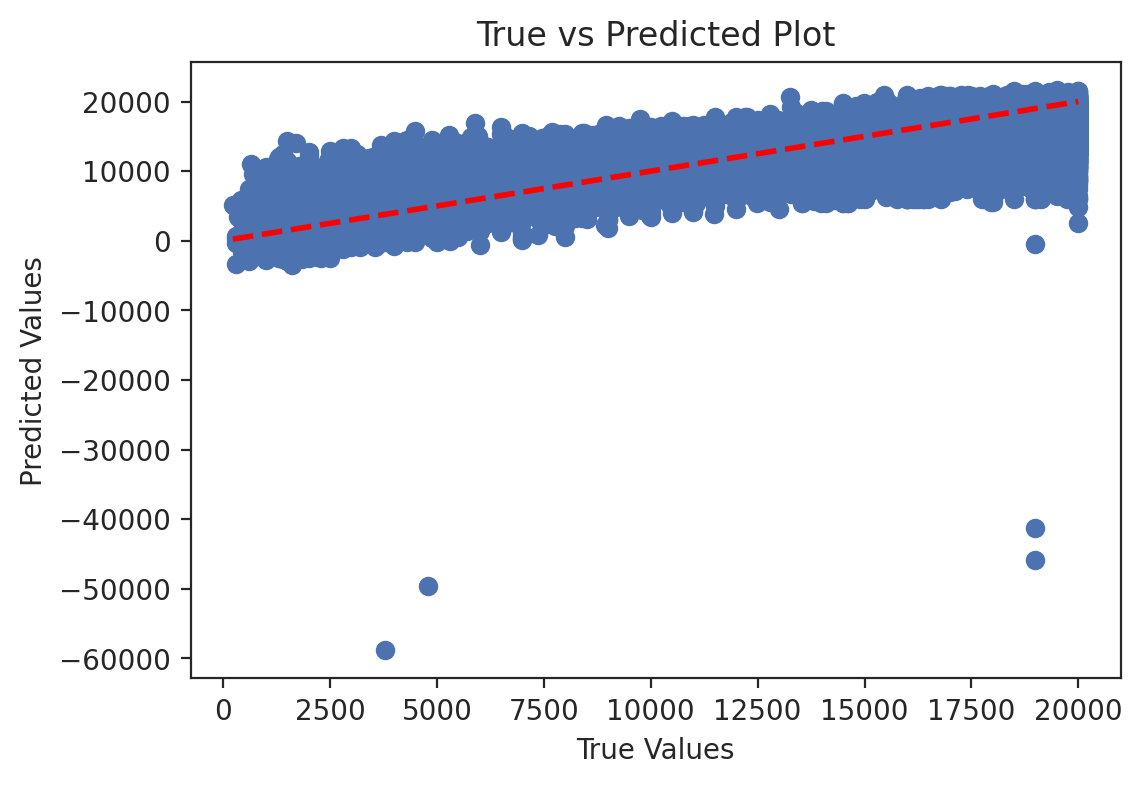

In [89]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


# nb ->>> (model = dt_reg or knn_reg or l_reg)
# dt_reg =>>> decision tree regressor
# knn_reg =>>> knn regressor
# l_reg =>>> linear regressor

# instantiate model
model = l_reg

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation metrics
print(f'R-squared (R2): {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')

# True vs Predicted plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Plot')
plt.show()


**Features Importance Extraction**

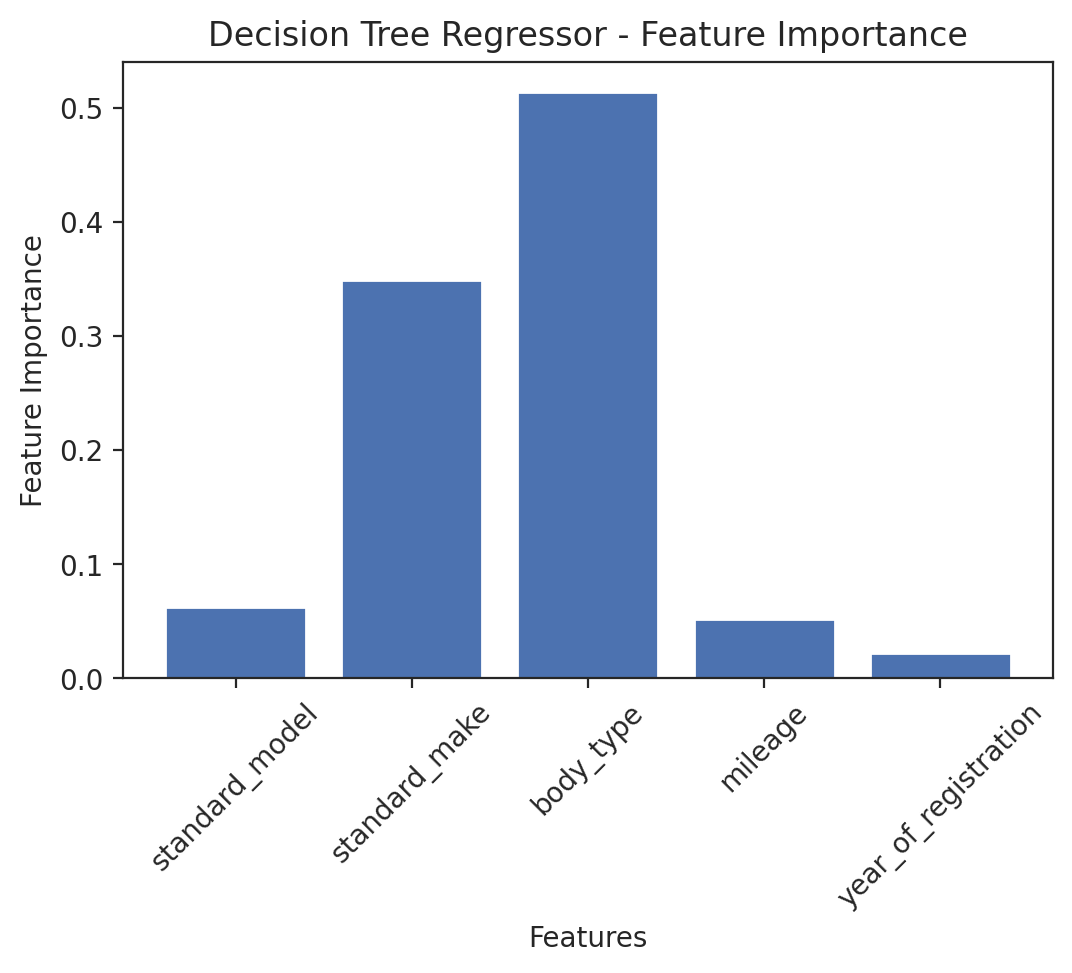

In [93]:


# Extract feature importance from the Decision Tree Regressor within the pipeline
tree_feature_importance = dt_reg.named_steps['dt'].feature_importances_

# Plot feature importance with original feature names
plt.bar(X.columns, tree_feature_importance)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Decision Tree Regressor - Feature Importance')
plt.xticks(rotation=45)
plt.show()


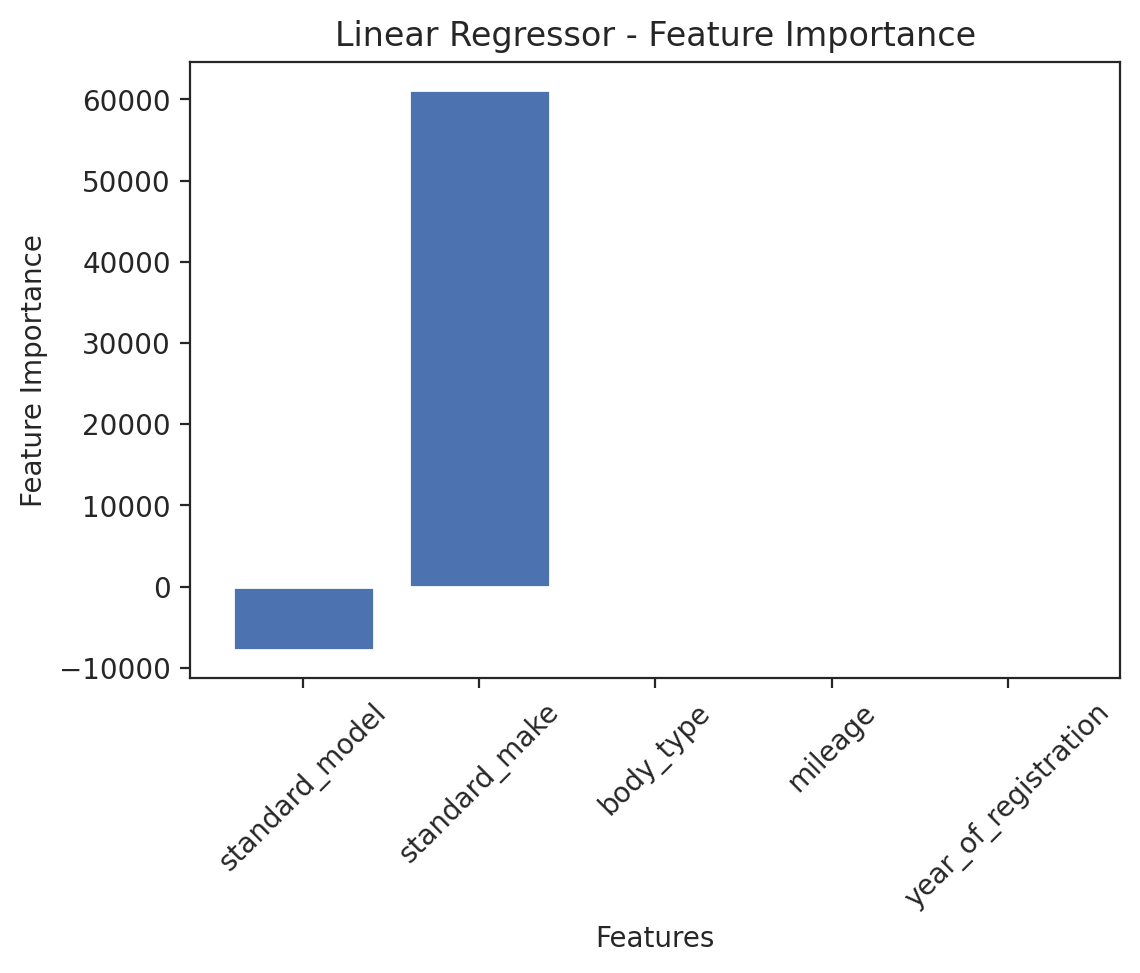

In [94]:
# Extract feature importance from the Linear Regressoor

# Extract coefficients from the Linear Regression model within the pipeline
coefficients = l_reg.named_steps['lr'].coef_

# Plot feature importance with original feature names
plt.bar(X.columns, coefficients)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Linear Regressor - Feature Importance')
plt.xticks(rotation=45)
plt.show()
